In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D

In [2]:
df = pd.read_csv("C:/AI_study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Features
- id: id
- Sex: 성별 M(수컷), F(암컷), I(유아기)
- Length: 길이(앞에서 뒤까지, mm)
- Diameter: 지름(길이에 수직인 방향, mm)
- Height: 높이(껍질 포함, mm)
- Whole_weight: 전체 무게(껍질 포함, g)
- Shucked_weight: 무게(껍질 제거, g)
- Viscera_weight: 전복 내장 무게(g)
- Shell_weight: 건조 후 껍질 무게(g)
- Rings: 나선(전복의 나이 추정, 나이 = Rings + 1.5) - label

- 현재 Features 중 id의 경우는 단순히 0 ~ 4176까지 나열한 것이므로 필요 없음
- Sex의 경우 object형으로 M, F, I를 값으로 가지기 때문에 EDA하고 모델에 넣기 위해 Label Encoding이 필요

In [5]:
# 필요 없는 Feature인 id 제거
df = df.drop('id', axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


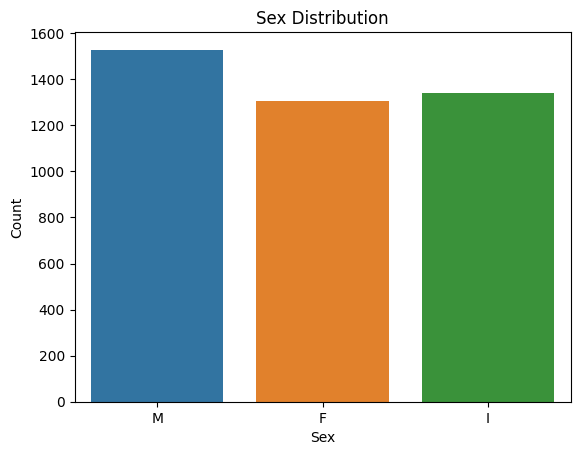

In [6]:
# Sex 분포 시각화
sns.countplot(data=df, x="Sex", hue="Sex", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

plt.show()

In [7]:
# Sex 피처에 Label Encoding 적용

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df.drop('Sex', axis=1)
df.insert(0, 'Sex_encoded', df.pop('Sex_encoded'))

# 결과 확인
print(df)

      Sex_encoded  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0               2   0.455     0.365   0.095        0.5140          0.2245   
1               2   0.350     0.265   0.090        0.2255          0.0995   
2               0   0.530     0.420   0.135        0.6770          0.2565   
3               2   0.440     0.365   0.125        0.5160          0.2155   
4               1   0.330     0.255   0.080        0.2050          0.0895   
...           ...     ...       ...     ...           ...             ...   
4172            0   0.565     0.450   0.165        0.8870          0.3700   
4173            2   0.590     0.440   0.135        0.9660          0.4390   
4174            2   0.600     0.475   0.205        1.1760          0.5255   
4175            0   0.625     0.485   0.150        1.0945          0.5310   
4176            2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1

In [8]:
df.describe()

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# 데이터 결측치 확인
df.isnull().sum()

Sex_encoded       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

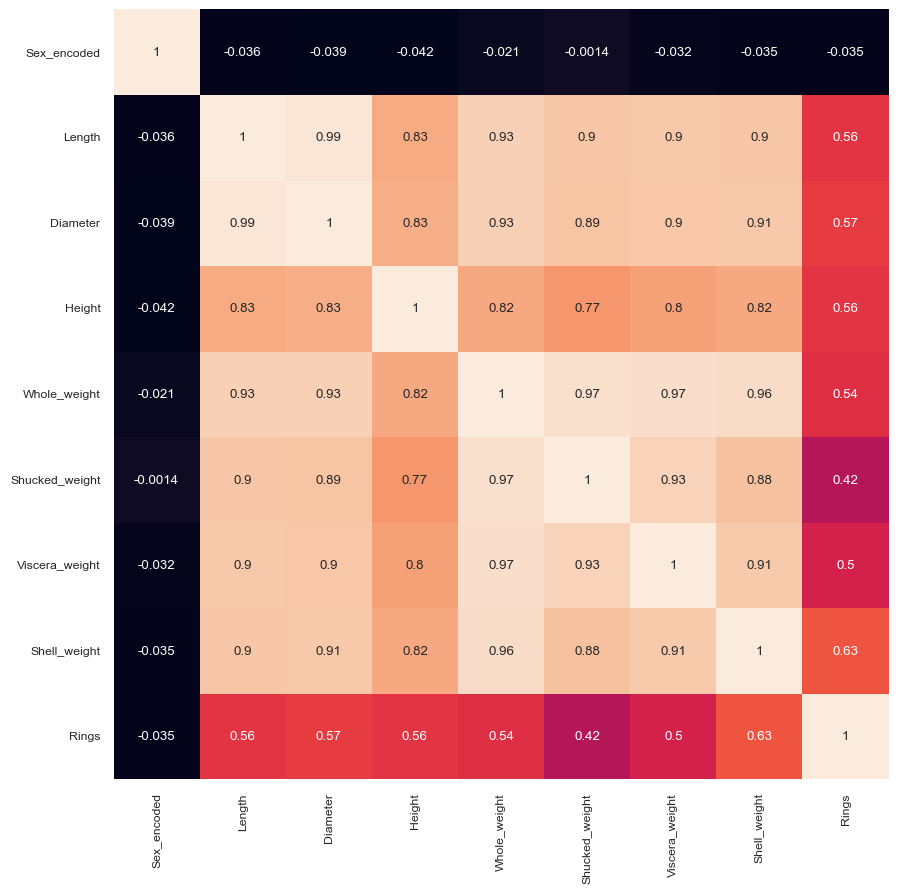

In [11]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Target인 Rings와 가장 높은 상관 관계를 맺는 feature
- Shell_weight(0.63)

## Target인 Rings와 비교적 낮은 상관 관계를 맺는 features
- Sex_encoded(-0.035)
- Shucked_weight(0.42)
- Visvera_weight(0.5)

- Sex_encoded의 경우 매우 낮은 상관 관계를 갖고 있기 때문에 추후에 삭제 가능 

array([[<Axes: title={'center': 'Sex_encoded'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

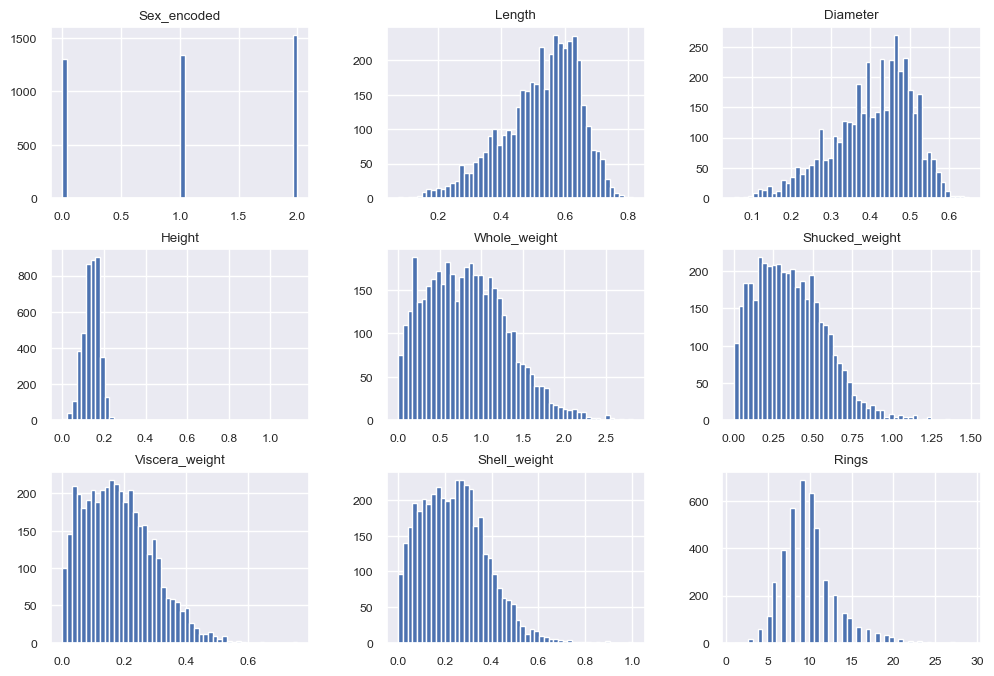

In [12]:
df.hist(bins=50, figsize=(12, 8))

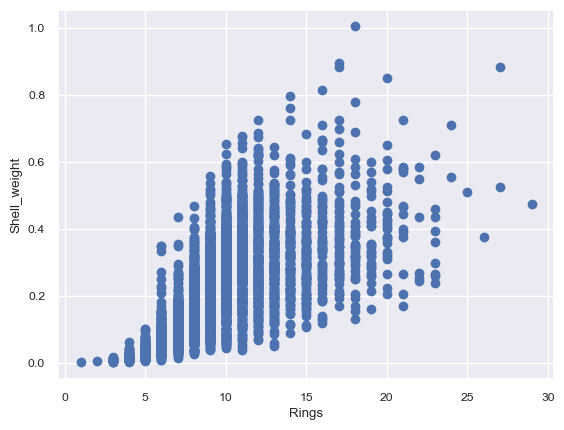

In [13]:
# Rings와 Shell_weight 관계
plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [14]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Sex_encoded       1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


#### Height(높이)가 0 값이 나오는 것은 이상치로 판단

In [15]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Height'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  4177
제거 후 데이터 개수:  4175


2개의 데이터 제거

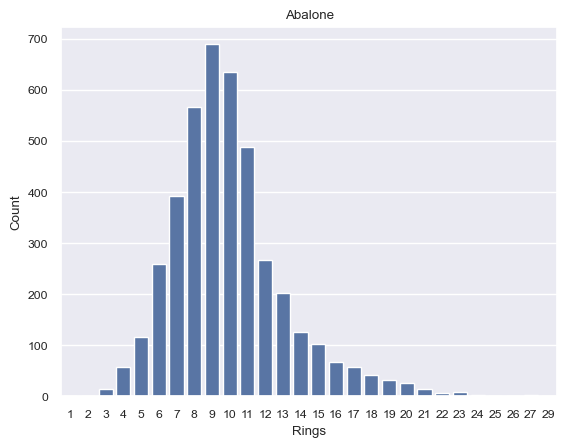

In [16]:
# Rings 시각화
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

plt.show()

In [17]:
# split_sequence 함수
def split_sequence(df, n_steps):
    X, y = [], []
    for i in range(len(df) - n_steps):
        seq_x = df.iloc[i:i+n_steps, :-1].values  # 마지막 열(Rings)을 제외한 특징들
        seq_y = df.iloc[i+n_steps, -1]  # Rings (예측할 값)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [18]:
n_steps = 7

X, y = split_sequence(df, n_steps)
print("입력 데이터 (X):", X)
print("출력 데이터 (y):", y)

입력 데이터 (X): [[[2.     0.455  0.365  ... 0.2245 0.101  0.15  ]
  [2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
  [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
  ...
  [1.     0.33   0.255  ... 0.0895 0.0395 0.055 ]
  [1.     0.425  0.3    ... 0.141  0.0775 0.12  ]
  [0.     0.53   0.415  ... 0.237  0.1415 0.33  ]]

 [[2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
  [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
  [2.     0.44   0.365  ... 0.2155 0.114  0.155 ]
  ...
  [1.     0.425  0.3    ... 0.141  0.0775 0.12  ]
  [0.     0.53   0.415  ... 0.237  0.1415 0.33  ]
  [0.     0.545  0.425  ... 0.294  0.1495 0.26  ]]

 [[0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
  [2.     0.44   0.365  ... 0.2155 0.114  0.155 ]
  [1.     0.33   0.255  ... 0.0895 0.0395 0.055 ]
  ...
  [0.     0.53   0.415  ... 0.237  0.1415 0.33  ]
  [0.     0.545  0.425  ... 0.294  0.1495 0.26  ]
  [2.     0.475  0.37   ... 0.2165 0.1125 0.165 ]]

 ...

 [[2.     0.5    0.38   ... 0.269  0.1265 0.1535]
  [0.   

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2667, 7, 8), (834, 7, 8), (2667,), (834,), (667, 7, 8), (667,))

## DL Model (CNN)

In [20]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

In [56]:
# Model 3
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=48, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # 출력 레이어, 회귀이므로 'linear' 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])  # 회귀에서는 MSE 사용
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 6, 16)             272       
                                                                 
 conv1d_31 (Conv1D)          (None, 4, 32)             1568      
                                                                 
 conv1d_32 (Conv1D)          (None, 1, 48)             6192      
                                                                 
 flatten_9 (Flatten)         (None, 48)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 392       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-train

In [57]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/50
167/167 [==============================] - 1s 4ms/step - loss: 24.8397 - mean_squared_error: 24.8397 - val_loss: 9.2953 - val_mean_squared_error: 9.2953
Epoch 2/50
167/167 [==============================] - 0s 3ms/step - loss: 9.6614 - mean_squared_error: 9.6614 - val_loss: 7.9792 - val_mean_squared_error: 7.9792
Epoch 3/50
167/167 [==============================] - 0s 3ms/step - loss: 8.8511 - mean_squared_error: 8.8511 - val_loss: 7.9974 - val_mean_squared_error: 7.9974
Epoch 4/50
167/167 [==============================] - 0s 3ms/step - loss: 8.4667 - mean_squared_error: 8.4667 - val_loss: 7.6379 - val_mean_squared_error: 7.6379
Epoch 5/50
167/167 [==============================] - 0s 3ms/step - loss: 8.2771 - mean_squared_error: 8.2771 - val_loss: 7.4319 - val_mean_squared_error: 7.4319
Epoch 6/50
167/167 [==============================] - 0s 2ms/step - loss: 8.1771 - mean_squared_error: 8.1771 - val_loss: 7.2718 - val_mean_squared_error: 7.2718
Epoch 7/50
167/167 [======

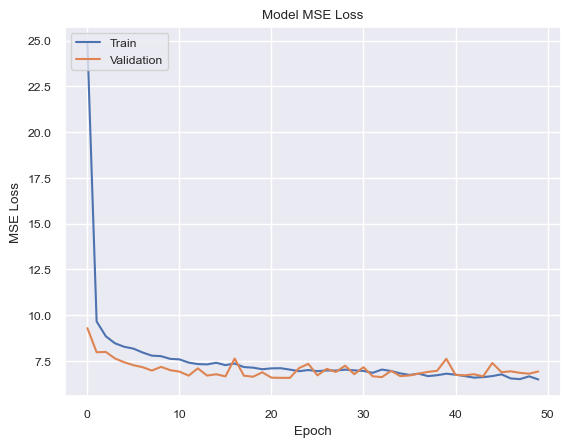

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

27/27 [==============================] - 0s 920us/step
MSE: 6.911304642821269
MAE: 1.8366334798524706
R^2 Score: 0.350424542563914


Text(0, 0.5, 'Predicted Values')

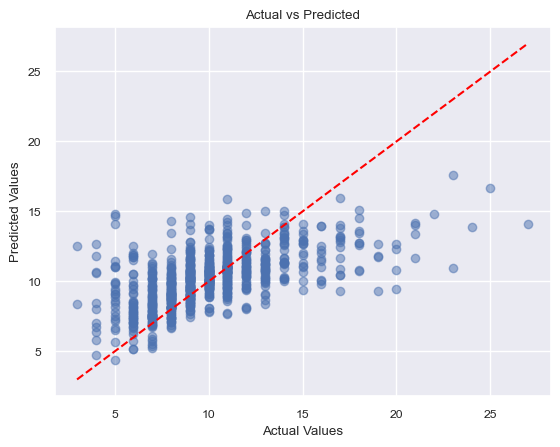

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델이 예측한 연속적인 값 (회귀)
predy = model.predict(X_test)

# 성능 지표 계산 (MSE, MAE, R^2)
mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# 예측값 vs 실제값 시각화
plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')